In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [3]:
hr = pd.read_csv('D:/MACHINE_LEARNING/datasets-master/HR Analytics.csv')
hr_dummies = pd.get_dummies(hr)


train, test = train_test_split(hr_dummies,
                               test_size=0.3,
                               random_state=100)

In [4]:
train_x = train.drop('Attrition', axis=1)
train_y = train['Attrition']

test_x = test.drop('Attrition', axis=1)
test_y = test['Attrition']

model = AdaBoostClassifier(random_state=100, n_estimators=300)
model.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=100)

## ROC Curves

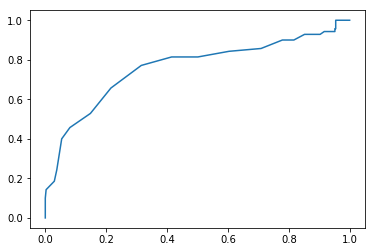

In [6]:
thresholds = []
tpr = []
fpr = []
pred_probs = pd.DataFrame(model.predict_proba(test_x),
                          columns=['Neg', 'Pos'])

for threshold in np.linspace(0,1,1000):
    pred_test = pred_probs['Pos'].apply(lambda v: 1 if v > threshold else 0)

    tn, fp, fn, tp = confusion_matrix(test_y, pred_test).ravel()
    sensitivity = (tp)/ (tp+fn)
    specificity = tn / (tn+fp)
    
    thresholds.append(threshold)
    tpr.append(sensitivity)
    fpr.append(1-specificity)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)

In [7]:
from sklearn.metrics import roc_curve
fpr_adabst_300, tpr_adabst_300, thr_adabst_300 = roc_curve(test_y,
                                                        pred_probs['Pos'])

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_dt = DecisionTreeClassifier(random_state=100, max_depth=5)
model_dt.fit(train_x, train_y)
pred_probs_dt = pd.DataFrame(model_dt.predict_proba(test_x),
                             columns=['Neg', 'Pos'])

fpr_dt_5, tpr_dt_5, thr_dt_5 = roc_curve(test_y,pred_probs_dt['Pos'])


model_rf = RandomForestClassifier(random_state=100, n_estimators=300)
model_rf.fit(train_x, train_y)
pred_probs_rf = pd.DataFrame(model_rf.predict_proba(test_x),
                             columns=['Neg', 'Pos'])

fpr_rf_300, tpr_rf_300, thr_rf_300 = roc_curve(test_y,pred_probs_rf['Pos'])